In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/CCPP/ccpp.xlsx'  # actual path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the Excel file
data = pd.read_excel(file_path)  # 'openpyxl' is included in Colab by default
data.columns = ["Temperature", "Exhaust_Vacuum", "Ambient_Pressure", "Relative_Humidity", "Energy_Output"]

# Display the first few rows
print("Dataset Head:")
print(data.head())


Dataset Head:
   Temperature  Exhaust_Vacuum  Ambient_Pressure  Relative_Humidity  \
0        14.96           41.76           1024.07              73.17   
1        25.18           62.96           1020.04              59.08   
2         5.11           39.40           1012.16              92.14   
3        20.86           57.32           1010.24              76.64   
4        10.82           37.50           1009.23              96.62   

   Energy_Output  
0         463.26  
1         444.37  
2         488.56  
3         446.48  
4         473.90  


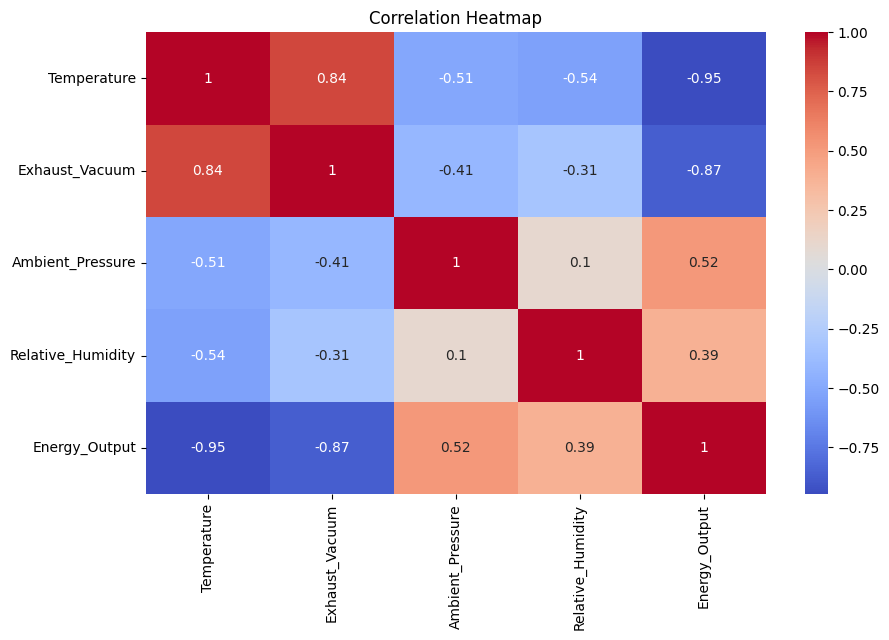

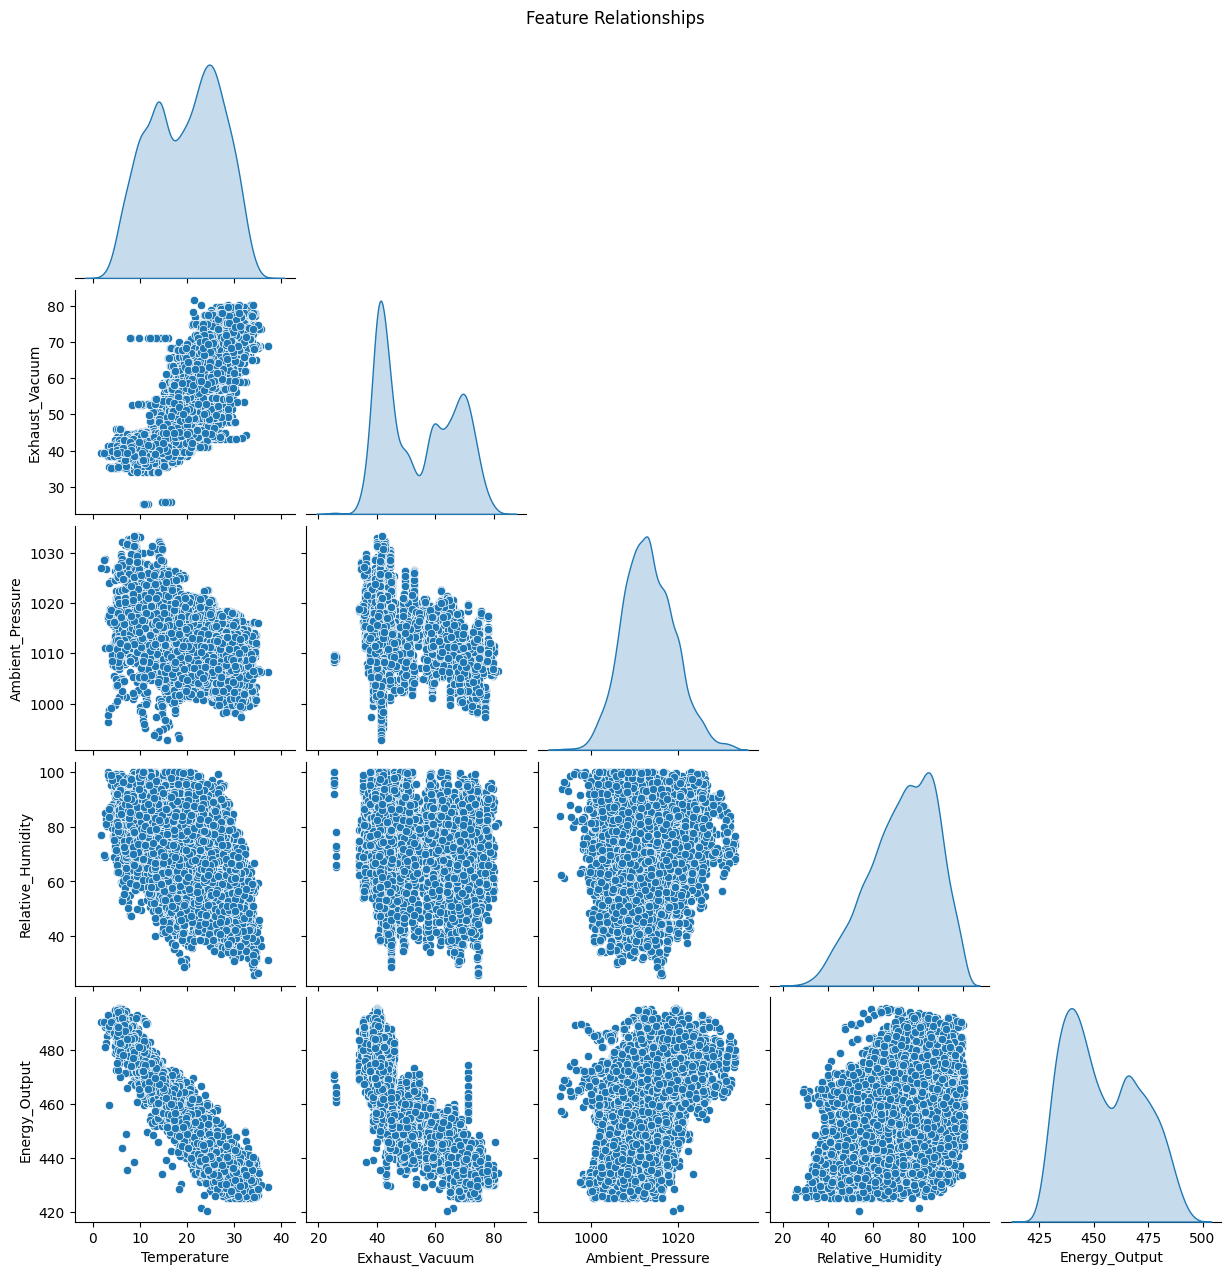

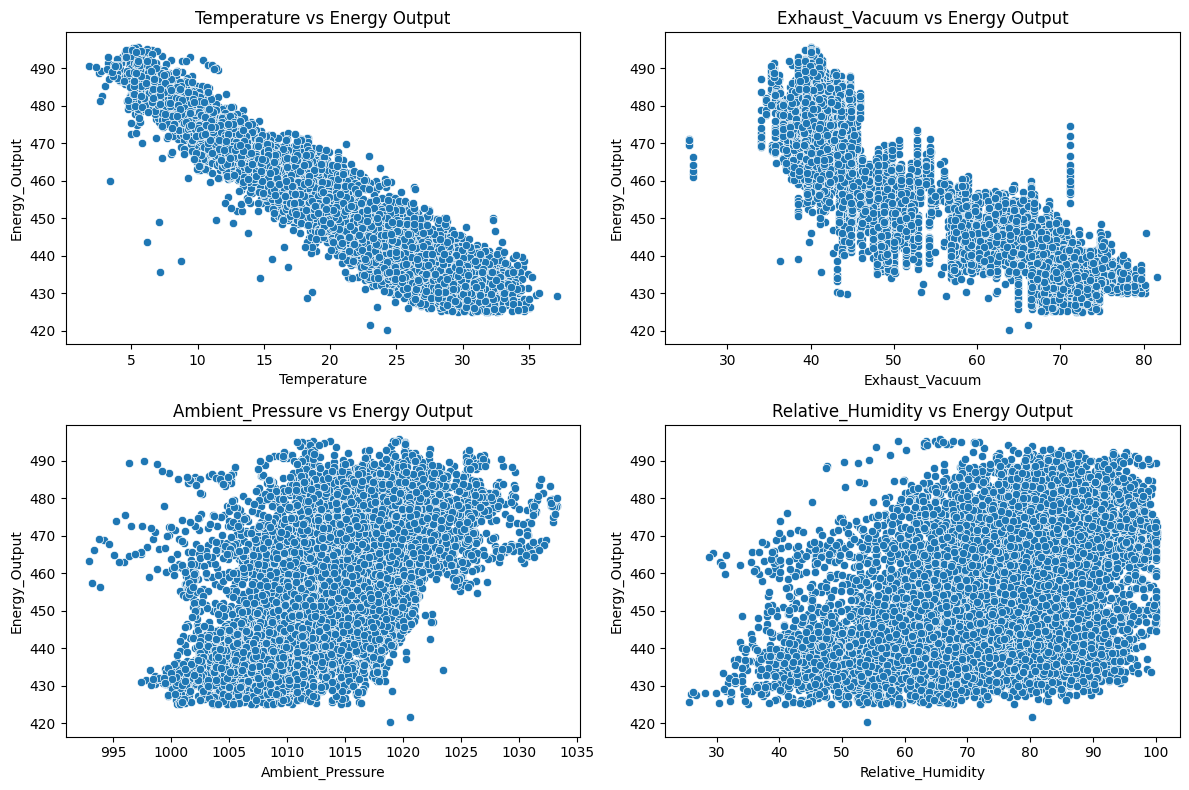

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships with the target variable
sns.pairplot(data, diag_kind="kde", corner=True)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Scatter plots of features vs target
features = ["Temperature", "Exhaust_Vacuum", "Ambient_Pressure", "Relative_Humidity"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data["Energy_Output"])
    plt.title(f"{feature} vs Energy Output")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop("Energy_Output", axis=1)
y = data["Energy_Output"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


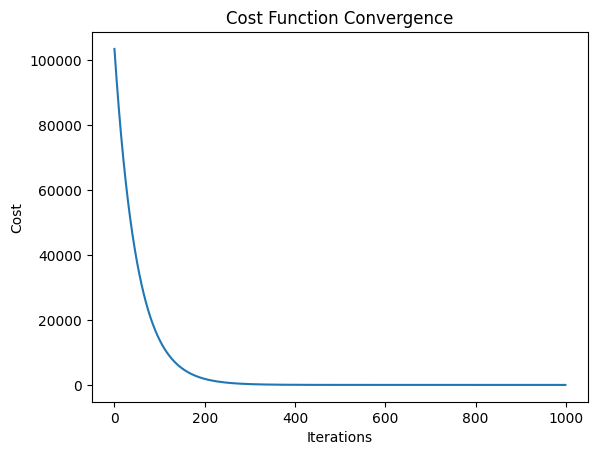

Theta (coefficients): [454.41142162 -11.95688897  -5.01755986   0.89716101  -1.38319795]


In [ ]:
import numpy as np

# Gradient Descent Implementation
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1/m) * X.T @ errors
        theta -= alpha * gradient

        # Compute the cost
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

# Add intercept term
X_train_scaled_with_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled_with_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Train the model
alpha = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_scaled_with_bias, y_train.values, alpha, iterations)

# Plot cost function convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

print("Theta (coefficients):", theta)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Predictions on testing data
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print out the errors and R-squared scores
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2: {r2_test:.4f}")

# Determine if the model is overfitting or underfitting
if mse_train < mse_test and r2_train > r2_test:
    print("The model may be OVERFITTING.")
elif mse_train > mse_test and r2_train < r2_test:
    print("The model may be UNDERFITTING.")
else:
    print("The model is fitting well.")



Training MSE: 20.8934
Testing MSE: 20.2737
Training R2: 0.9283
Testing R2: 0.9301
The model may be UNDERFITTING.


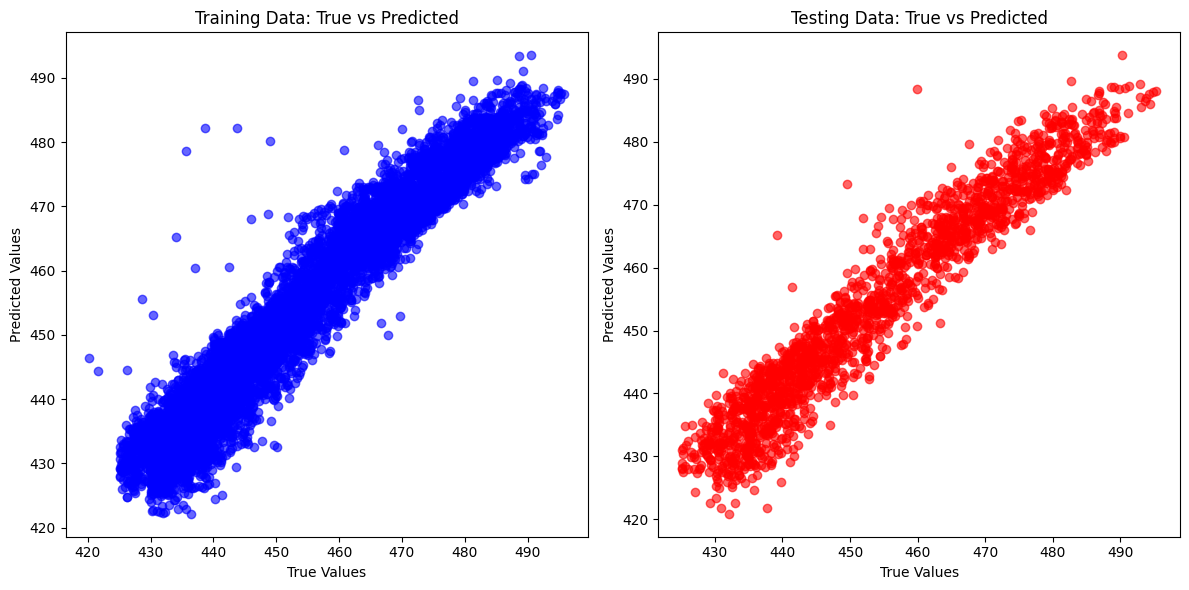

In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions vs true values for both training and testing sets
plt.figure(figsize=(12, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title("Training Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6)
plt.title("Testing Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/CCPP/ccpp.xlsx'  # actual path
import pandas as pd

# Load the Excel file
data = pd.read_excel(file_path)  # 'openpyxl' is included in Colab by default
data.columns = ["Temperature", "Exhaust_Vacuum", "Ambient_Pressure", "Relative_Humidity", "Energy_Output"]

# Display the first few rows
print("Dataset Head:")
print(data.head())
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships with the target variable
sns.pairplot(data, diag_kind="kde", corner=True)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Scatter plots of features vs target
features = ["Temperature", "Exhaust_Vacuum", "Ambient_Pressure", "Relative_Humidity"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data["Energy_Output"])
    plt.title(f"{feature} vs Energy Output")
plt.tight_layout()
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop("Energy_Output", axis=1)
y = data["Energy_Output"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import numpy as np

# Gradient Descent Implementation
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1/m) * X.T @ errors
        theta -= alpha * gradient

        # Compute the cost
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

# Add intercept term
X_train_scaled_with_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled_with_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Train the model
alpha = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_scaled_with_bias, y_train.values, alpha, iterations)

# Plot cost function convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

print("Theta (coefficients):", theta)
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Predictions on testing data
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print out the errors and R-squared scores
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2: {r2_test:.4f}")

# Determine if the model is overfitting or underfitting
if mse_train < mse_test and r2_train > r2_test:
    print("The model may be OVERFITTING.")
elif mse_train > mse_test and r2_train < r2_test:
    print("The model may be UNDERFITTING.")
else:
    print("The model is fitting well.")

import matplotlib.pyplot as plt

# Plot the predictions vs true values for both training and testing sets
plt.figure(figsize=(12, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title("Training Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6)
plt.title("Testing Data: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()
